## Notebook Instructions

<i> You can run the notebook document sequentially (one cell a time) by pressing <b> shift + enter </b>. While a cell is running, In [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook. Example: In [8]: </i>

<i> Enter edit mode by pressing <b> Enter </b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area. </i>

## A Simple User-Defined Function 

Let us create a simple mathematical function.

The syntax for constructing a function is:
<pre>
def function_name (parameter-list):
	Statements, i.e function body
    return a value, if required
</pre>

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv ('./CSV/GBPUSD.csv')
df.head()

,Local time,Open,High,Low,Close,Volume
0,28.02.2018 22:00:00.000 GMT-0000,1.37591,1.37846,1.37115,1.37746,2.096890e+08
1,01.03.2018 22:00:00.000 GMT-0000,1.37745,1.38166,1.37554,1.37980,1.913914e+08
2,02.03.2018 22:00:00.000 GMT-0000,1.37980,1.37980,1.37980,1.37980,0.000000e+00
3,03.03.2018 22:00:00.000 GMT-0000,1.37980,1.37980,1.37980,1.37980,0.000000e+00
4,04.03.2018 22:00:00.000 GMT-0000,1.37886,1.38769,1.37664,1.38482,1.853236e+08


In [118]:
def bollinger_bands (data, n): 
    
    # Calculating the moving average
    MA = data['Close'].rolling(window=n).mean() 
    # MA = pd.rolling_mean(data['Close'],n)

    
    # Calculating the standard deviation
    SD = data['Close'].rolling(window=n).std() 
    # SD = pd.rolling_std(data['Close'],n)

    data['Lower_BB'] = MA - (2 * SD) # Lower Bollinger Band
    data['Upper_BB'] = MA + (2 * SD) # Upper Bollinger Band
   
    return data

In [119]:
df_bb = bollinger_bands (df, 21)
df_bb.tail()

,Local time,Open,High,Low,Close,Volume,Lower_BB,Upper_BB
362,25.02.2019 22:00:00.000 GMT-0000,1.30956,1.32878,1.30936,1.32502,3.079637e+08,1.275700,1.317895
363,26.02.2019 22:00:00.000 GMT-0000,1.32500,1.33499,1.32330,1.33067,2.855481e+08,1.272950,1.324247
364,27.02.2019 22:00:00.000 GMT-0000,1.33066,1.33192,1.32531,1.32613,2.550246e+08,1.271824,1.328321
365,28.02.2019 22:00:00.000 GMT-0000,1.32608,1.32864,1.31716,1.31983,2.377440e+08,1.271898,1.330668
366,01.03.2019 22:00:00.000 GMT-0000,1.31983,1.31983,1.31983,1.31983,0.000000e+00,1.272217,1.332770


## Plot Bollinger Bands

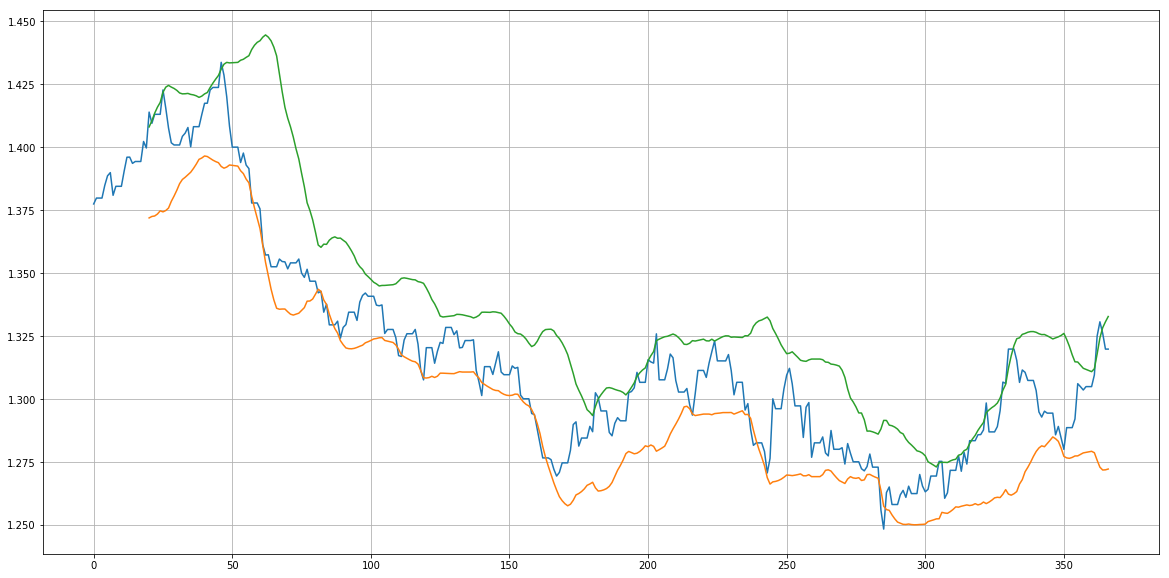

In [120]:
plt.figure(figsize=(20,10))

plt.plot(df_bb.Close)
plt.plot(df_bb.Lower_BB)
plt.plot(df_bb.Upper_BB)
plt.grid(True)

plt.show()

# Pandas Dataframe

## Use an existing column as an index of a dataframe
## Renaming columns
## Sorting 


In [121]:
#Inplace replaces the index with the new index
df_bb.set_index('Local time', inplace=True)
df_bb.tail()

,Open,High,Low,Close,Volume,Lower_BB,Upper_BB
Local time,,,,,,,
25.02.2019 22:00:00.000 GMT-0000,1.30956,1.32878,1.30936,1.32502,3.079637e+08,1.275700,1.317895
26.02.2019 22:00:00.000 GMT-0000,1.32500,1.33499,1.32330,1.33067,2.855481e+08,1.272950,1.324247
27.02.2019 22:00:00.000 GMT-0000,1.33066,1.33192,1.32531,1.32613,2.550246e+08,1.271824,1.328321
28.02.2019 22:00:00.000 GMT-0000,1.32608,1.32864,1.31716,1.31983,2.377440e+08,1.271898,1.330668
01.03.2019 22:00:00.000 GMT-0000,1.31983,1.31983,1.31983,1.31983,0.000000e+00,1.272217,1.332770


In [122]:
#Axis refers to: 1 for column, 0 for row.
df_no_bb = df_bb.drop(['Lower_BB','Upper_BB'], axis=1)
df_no_bb.head()

,Open,High,Low,Close,Volume
Local time,,,,,
28.02.2018 22:00:00.000 GMT-0000,1.37591,1.37846,1.37115,1.37746,2.096890e+08
01.03.2018 22:00:00.000 GMT-0000,1.37745,1.38166,1.37554,1.37980,1.913914e+08
02.03.2018 22:00:00.000 GMT-0000,1.37980,1.37980,1.37980,1.37980,0.000000e+00
03.03.2018 22:00:00.000 GMT-0000,1.37980,1.37980,1.37980,1.37980,0.000000e+00
04.03.2018 22:00:00.000 GMT-0000,1.37886,1.38769,1.37664,1.38482,1.853236e+08


In [123]:
#Rename columns, inplace means to modify the df inplace.
df_no_bb.rename(index=str, columns={"Open": "open"}, inplace=True)
df_no_bb.head()

,open,High,Low,Close,Volume
Local time,,,,,
28.02.2018 22:00:00.000 GMT-0000,1.37591,1.37846,1.37115,1.37746,2.096890e+08
01.03.2018 22:00:00.000 GMT-0000,1.37745,1.38166,1.37554,1.37980,1.913914e+08
02.03.2018 22:00:00.000 GMT-0000,1.37980,1.37980,1.37980,1.37980,0.000000e+00
03.03.2018 22:00:00.000 GMT-0000,1.37980,1.37980,1.37980,1.37980,0.000000e+00
04.03.2018 22:00:00.000 GMT-0000,1.37886,1.38769,1.37664,1.38482,1.853236e+08


In [128]:
# Sorting Dataframe in descending order

df_no_bb.sort_values(by="Close", ascending=True, inplace=True)

df_no_bb.head(20) #Prints top 20 values of closing prices in the given dataset

,open,High,Low,Close,Volume
Local time,,,,,
10.12.2018 22:00:00.000 GMT-0000,1.25568,1.26382,1.24796,1.24837,1.805152e+08
09.12.2018 22:00:00.000 GMT-0000,1.27048,1.27598,1.25065,1.25595,1.859749e+08
13.12.2018 22:00:00.000 GMT-0000,1.26504,1.26648,1.25290,1.25813,1.634454e+08
15.12.2018 22:00:00.000 GMT-0000,1.25813,1.25813,1.25813,1.25813,0.000000e+00
14.12.2018 22:00:00.000 GMT-0000,1.25813,1.25813,1.25813,1.25813,0.000000e+00
01.01.2019 22:00:00.000 GMT-0000,1.27459,1.27729,1.25808,1.26060,2.370905e+08
18.12.2018 22:00:00.000 GMT-0000,1.26332,1.26787,1.26064,1.26097,2.471455e+08
16.12.2018 22:00:00.000 GMT-0000,1.26008,1.26470,1.25629,1.26199,1.721460e+08
20.12.2018 22:00:00.000 GMT-0000,1.26541,1.26977,1.26173,1.26247,3.079771e+08


In [130]:
#Number of non-nulls
print('\n==================\n Count Method \n==================\n', 
      df_no_bb.count())

print('\n==================\n Open Column Count \n==================\n',
      df_no_bb['open'].count())

print('\n==================\n Max \n==================\n',
      df_no_bb.max())

print('\n==================\n Mean \n==================\n',
      df_no_bb.mean())

print('\n==================\n Percent Change \n==================\n',
      df_no_bb['open'].pct_change().head(50))


 Count Method 
 open      367
High      367
Low       367
Close     367
Volume    367
dtype: int64

 Open Column Count 
 367

 Max 
 open      1.433660e+00
High      1.437630e+00
Low       1.428260e+00
Close     1.433690e+00
Volume    6.987172e+08
dtype: float64

 Mean 
 open      1.319416e+00
High      1.323375e+00
Low       1.315894e+00
Close     1.319302e+00
Volume    1.206676e+08
dtype: float64

 Percent Change 
 Local time
10.12.2018 22:00:00.000 GMT-0000         NaN
09.12.2018 22:00:00.000 GMT-0000    0.011786
13.12.2018 22:00:00.000 GMT-0000   -0.004282
15.12.2018 22:00:00.000 GMT-0000   -0.005462
14.12.2018 22:00:00.000 GMT-0000    0.000000
01.01.2019 22:00:00.000 GMT-0000    0.013083
18.12.2018 22:00:00.000 GMT-0000   -0.008842
16.12.2018 22:00:00.000 GMT-0000   -0.002565
20.12.2018 22:00:00.000 GMT-0000    0.004230
22.12.2018 22:00:00.000 GMT-0000   -0.002323
21.12.2018 22:00:00.000 GMT-0000    0.000000
02.01.2019 22:00:00.000 GMT-0000   -0.001481
11.12.2018 22:00:00.000 GMT

## Statistical Methods

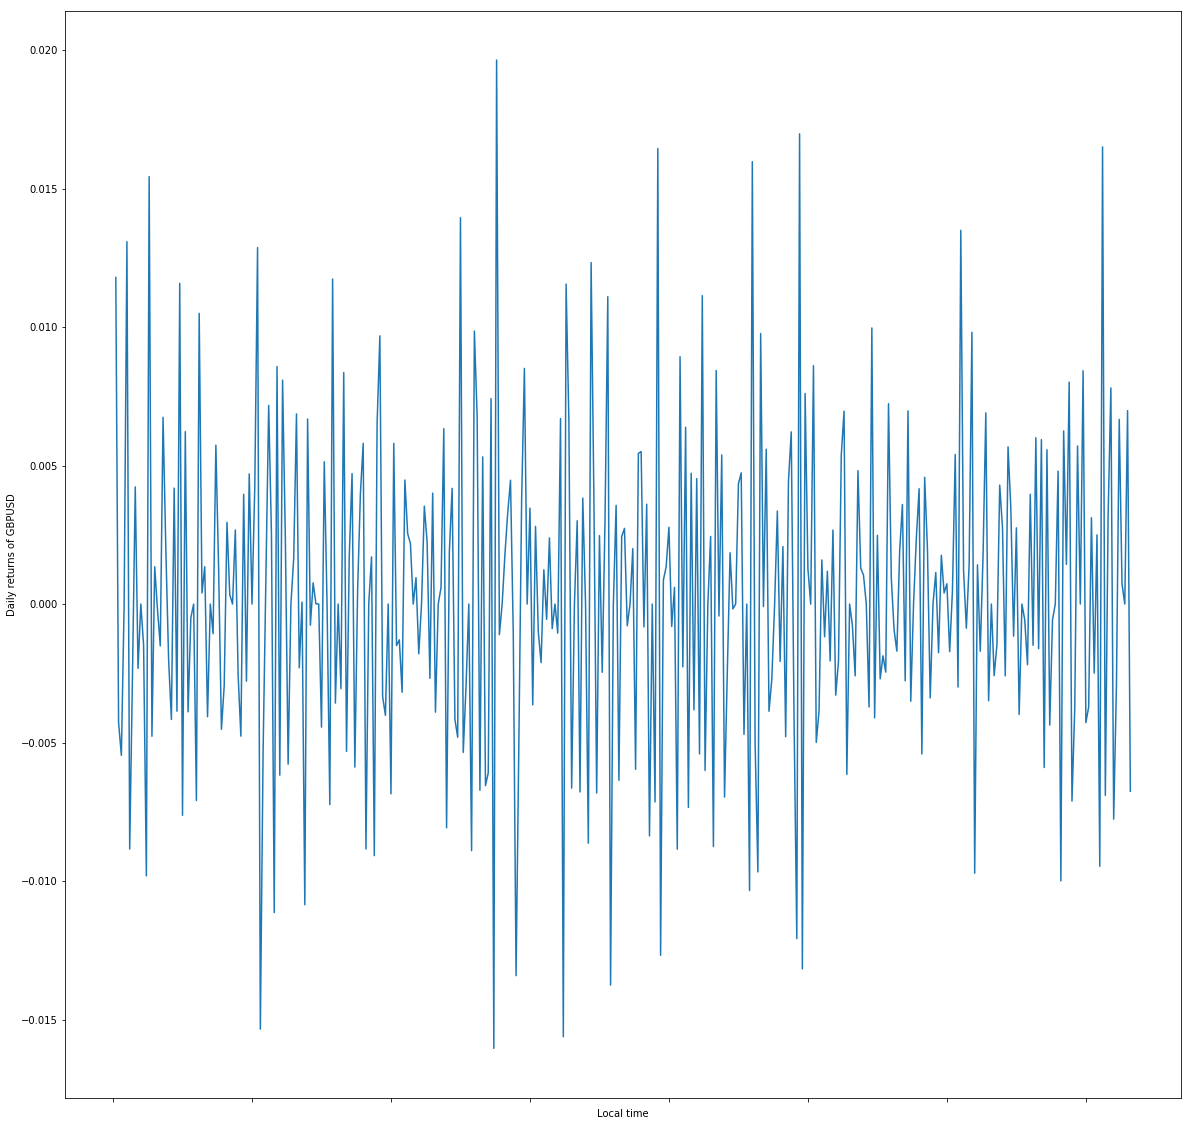

In [138]:
plt.figure(figsize = (20,20))
plt.ylabel('Daily returns of GBPUSD')
df_no_bb['open'].pct_change().plot()
plt.show()